<a href="https://colab.research.google.com/github/mmbs1989/DSWP-Aluno/blob/main/TCCfinalexp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [16]:
df = pd.read_csv("https://raw.githubusercontent.com/mmbs1989/DSWP-Aluno/main/dadostccdata.csv")
dfa = pd.read_csv("https://raw.githubusercontent.com/mmbs1989/DSWP-Aluno/main/dadostcce.csv")
df = df.drop(df.index[314:])
dfa = dfa.drop(dfa.index[314:])
df['e'] = dfa['e']
df['e'] = pd.to_numeric(df['e'])
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
df.set_index('ds', inplace=True)


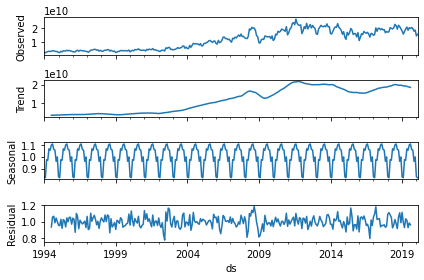

In [17]:
result = seasonal_decompose(df, model='multiplicative')
fig = result.plot()

In [18]:
df.tail(30)

,y
ds,
2017-09-01,18659335519
2017-10-01,18871946607
2017-11-01,16683107767
2017-12-01,17595288111
2018-01-01,17027282678
2018-02-01,17410056953
2018-03-01,20228663253
2018-04-01,19712800434
2018-05-01,19325063725


In [5]:
df.dtypes

y    int64
dtype: object

In [6]:
print(df.shape)

(314, 1)


In [19]:
df.describe()

,y
count,3.140000e+02
mean,1.164247e+10
std,6.617466e+09
min,2.747188e+09
25%,4.632934e+09
50%,1.184663e+10
75%,1.768190e+10
max,2.614824e+10


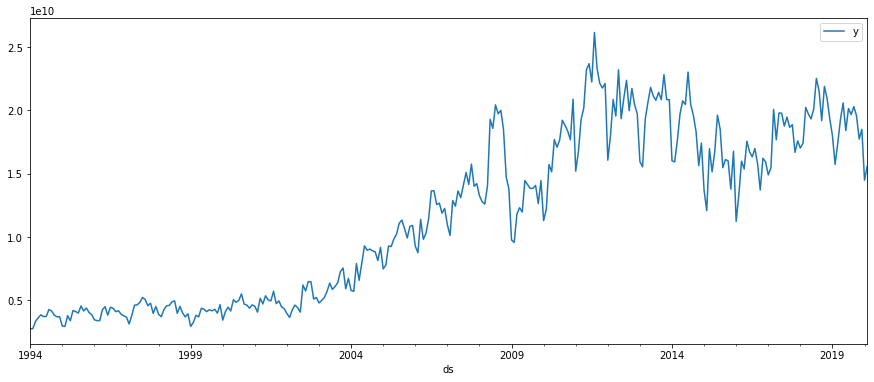

In [20]:
df.plot(figsize=(15,6))

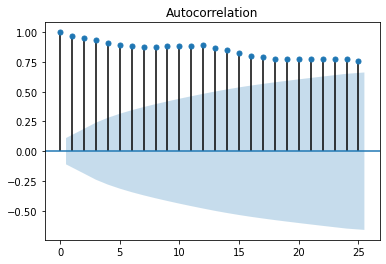

In [21]:
plot_acf(df)
plt.show()

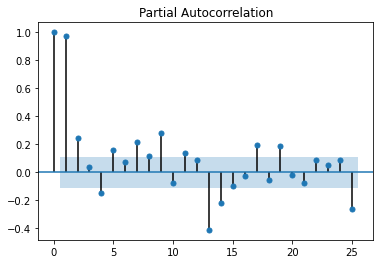

In [22]:
plot_pacf(df)
plt.show()

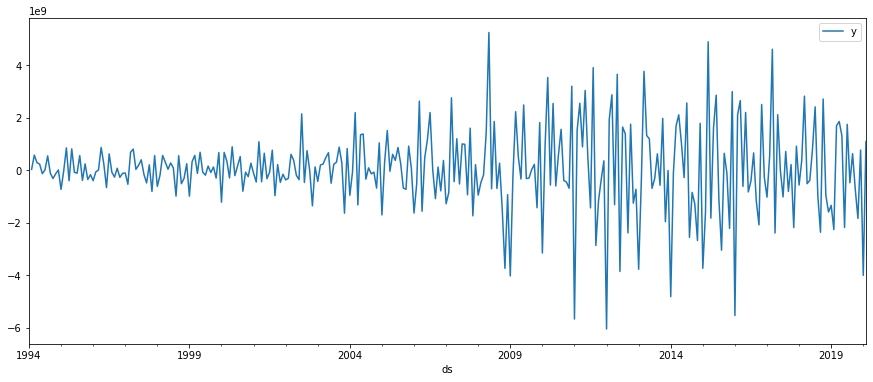

In [23]:
df.diff().plot(figsize=(15,6))

In [24]:
arima = ARIMA(df, freq='MS', order=(5,1,2)).fit()
(arima.resid ** 2).mean()

1.9457364581391444e+18

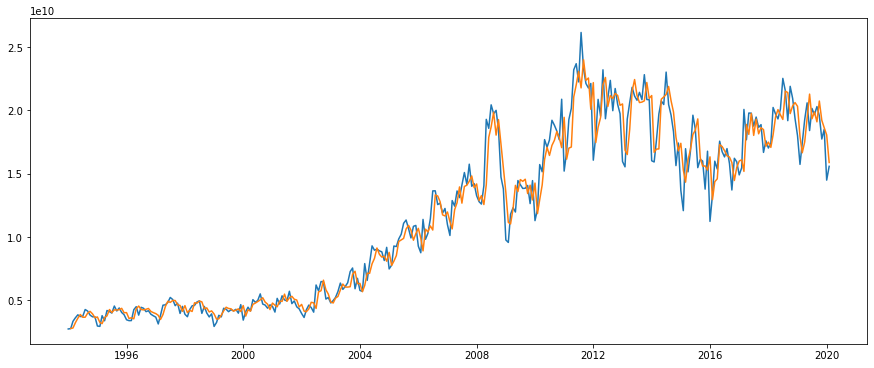

In [25]:
plt.figure(figsize=(15,6))
plt.plot(df)
plt.plot(arima.predict(typ='levels'))

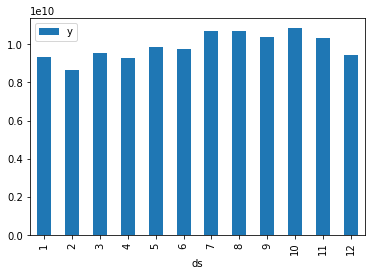

In [15]:
df.groupby(df.index.month).mean().plot(kind='bar')